In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyedflib
from matplotlib.collections import LineCollection
from matplotlib.pyplot import figure

In [2]:
file = pyedflib.EdfReader("./datasets/eegmmidb/S001/S001R03.edf")

In [3]:
nch = file.signals_in_file
signal_labels = file.getSignalLabels()
annotation = file.readAnnotations()

In [4]:
file.getPhysicalDimension(1)

'uV'

In [5]:
file.getFileDuration()

125.0

In [6]:
file.getSampleFrequencies()

array([160., 160., 160., 160., 160., 160., 160., 160., 160., 160., 160.,
       160., 160., 160., 160., 160., 160., 160., 160., 160., 160., 160.,
       160., 160., 160., 160., 160., 160., 160., 160., 160., 160., 160.,
       160., 160., 160., 160., 160., 160., 160., 160., 160., 160., 160.,
       160., 160., 160., 160., 160., 160., 160., 160., 160., 160., 160.,
       160., 160., 160., 160., 160., 160., 160., 160., 160.])

In [7]:
annotation

(array([  0. ,   4.2,   8.3,  12.5,  16.6,  20.8,  24.9,  29.1,  33.2,
         37.4,  41.5,  45.7,  49.8,  54. ,  58.1,  62.3,  66.4,  70.6,
         74.7,  78.9,  83. ,  87.2,  91.3,  95.5,  99.6, 103.8, 107.9,
        112.1, 116.2, 120.4]),
 array([4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2,
        4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1,
        4.2, 4.1, 4.2, 4.1]),
 array(['T0', 'T2', 'T0', 'T1', 'T0', 'T1', 'T0', 'T2', 'T0', 'T2', 'T0',
        'T1', 'T0', 'T1', 'T0', 'T2', 'T0', 'T1', 'T0', 'T2', 'T0', 'T2',
        'T0', 'T1', 'T0', 'T1', 'T0', 'T2', 'T0', 'T1'], dtype='<U2'))

In [8]:
data= []
for i in range(nch):
    data.append(file.readSignal(i))
    
data= np.array(data)

In [9]:
data

array([[ -57.,  -49.,  -55., ...,    0.,    0.,    0.],
       [ -13.,  -11.,  -17., ...,    0.,    0.,    0.],
       [ -15.,  -10.,  -16., ...,    0.,    0.,    0.],
       ...,
       [ -56.,  -70.,  -77., ...,    0.,    0.,    0.],
       [-124., -149., -153., ...,    0.,    0.,    0.],
       [ -28.,  -40.,  -37., ...,    0.,    0.,    0.]])

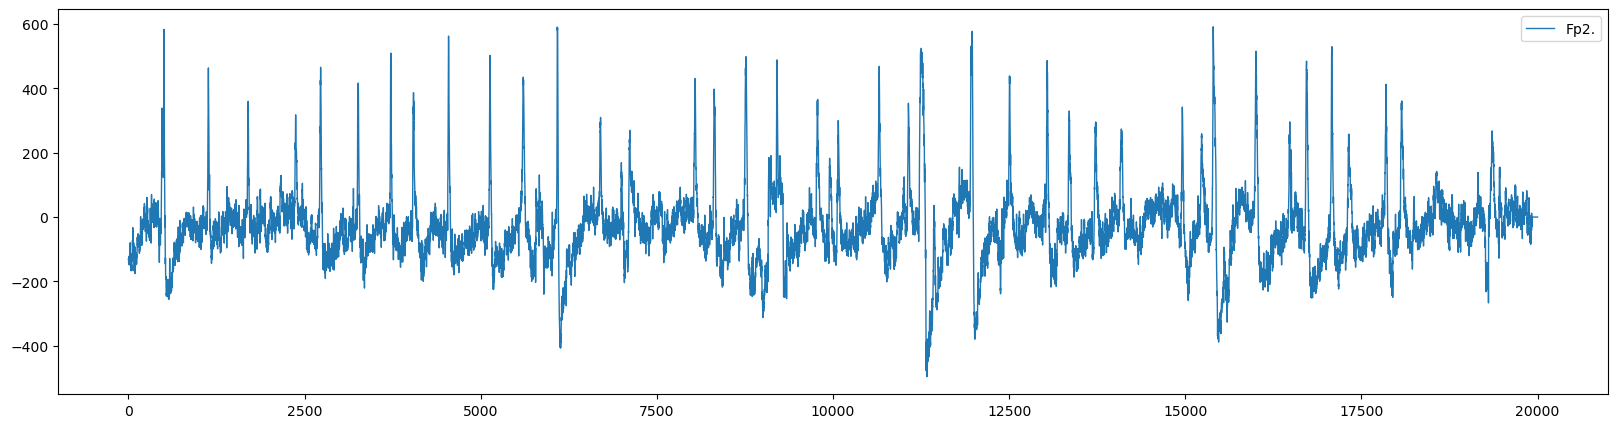

In [10]:
plt.figure(1, figsize=(20, 5))

plt.plot(data[23], linewidth=1, label=signal_labels[23])

plt.legend()
plt.show()

In [11]:
print(data)

[[ -57.  -49.  -55. ...    0.    0.    0.]
 [ -13.  -11.  -17. ...    0.    0.    0.]
 [ -15.  -10.  -16. ...    0.    0.    0.]
 ...
 [ -56.  -70.  -77. ...    0.    0.    0.]
 [-124. -149. -153. ...    0.    0.    0.]
 [ -28.  -40.  -37. ...    0.    0.    0.]]


In [12]:
singalDuration= int((annotation[1] * 160).sum())

In [13]:
data= data [:,:singalDuration]

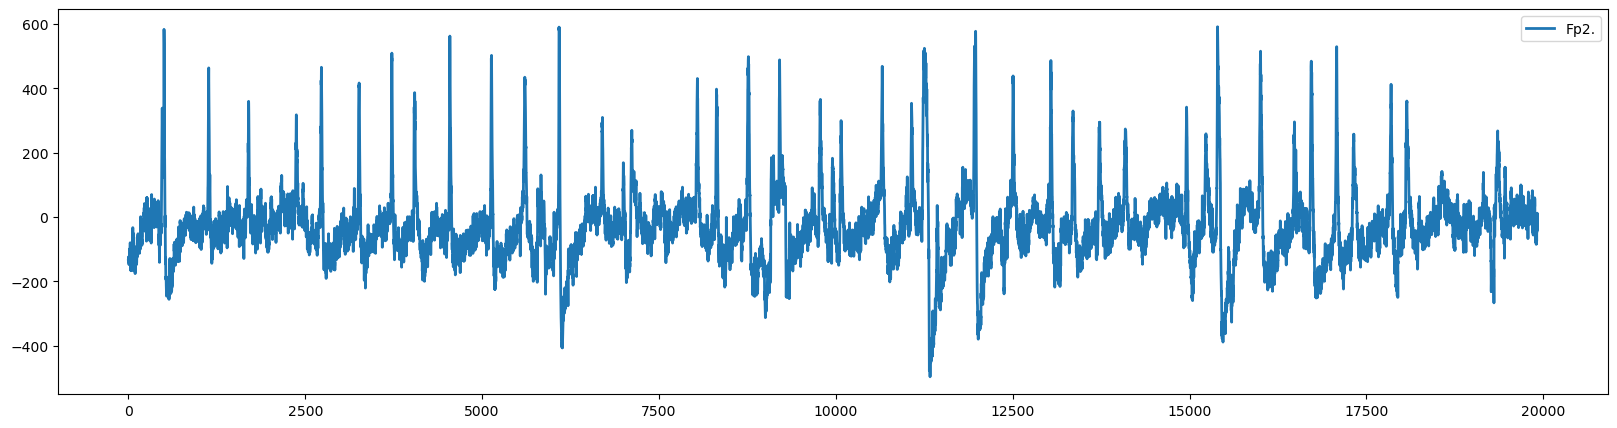

In [14]:
plt.figure(1, figsize=(20, 5))
plt.plot(data[23], linewidth=2, label=signal_labels[23])

plt.legend()
plt.show()

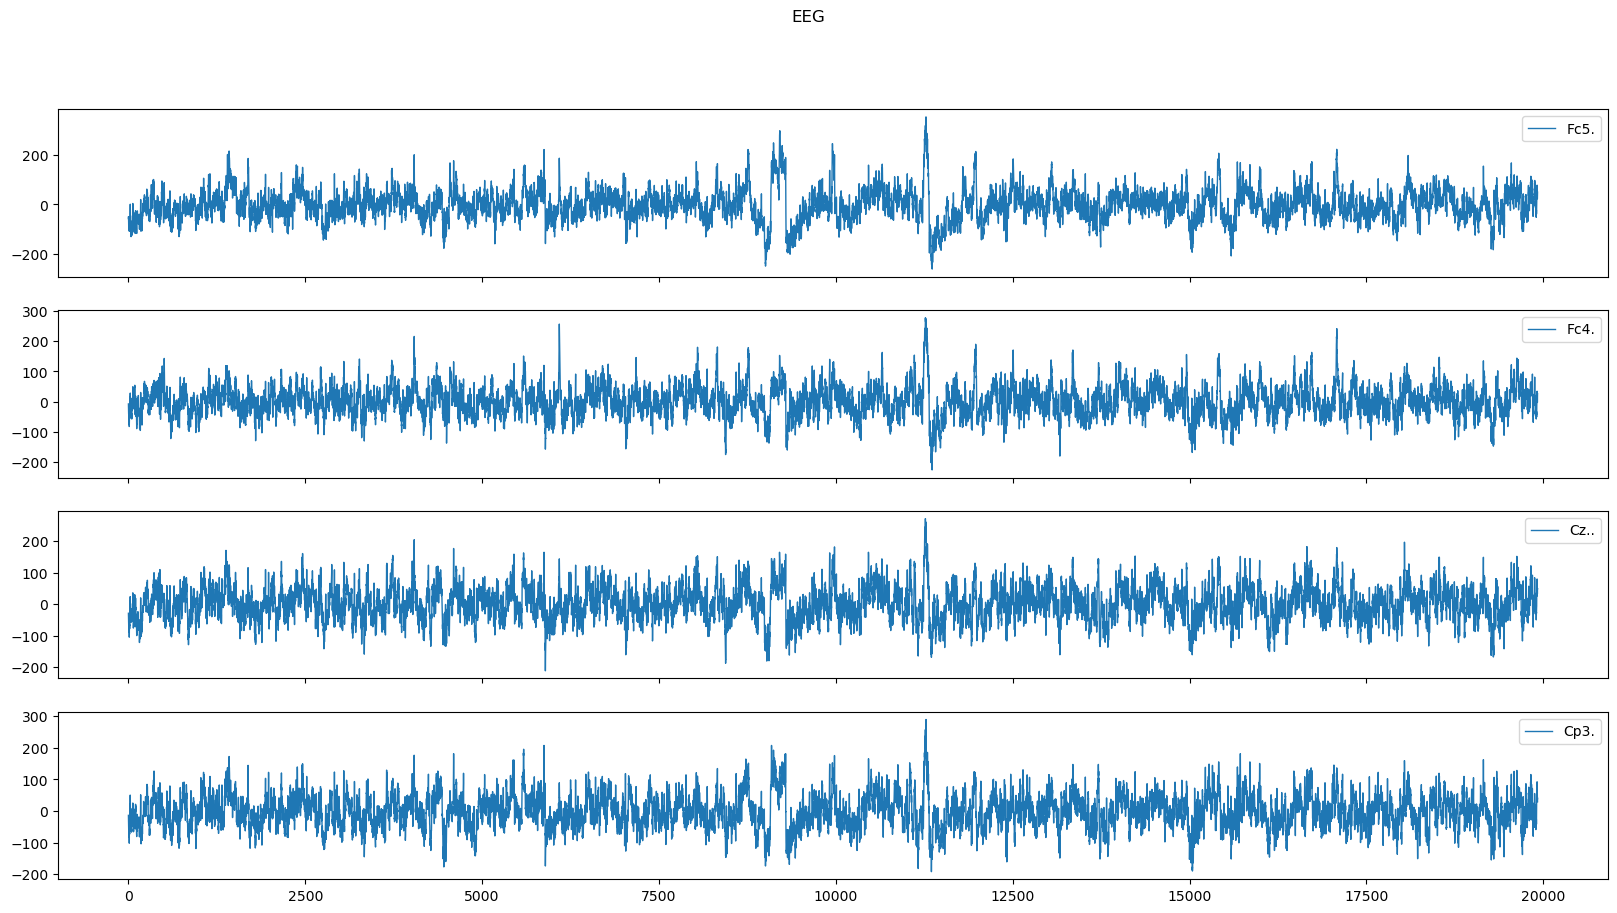

In [15]:
nplot=4
fig, axs = plt.subplots(nplot, sharex=True)
fig.set_size_inches(20, 10)
fig.suptitle('EEG')

for i in range (nplot):
    axs[i].plot(data[5*i], linewidth=1, label=signal_labels[5*i])
    axs[i].legend()

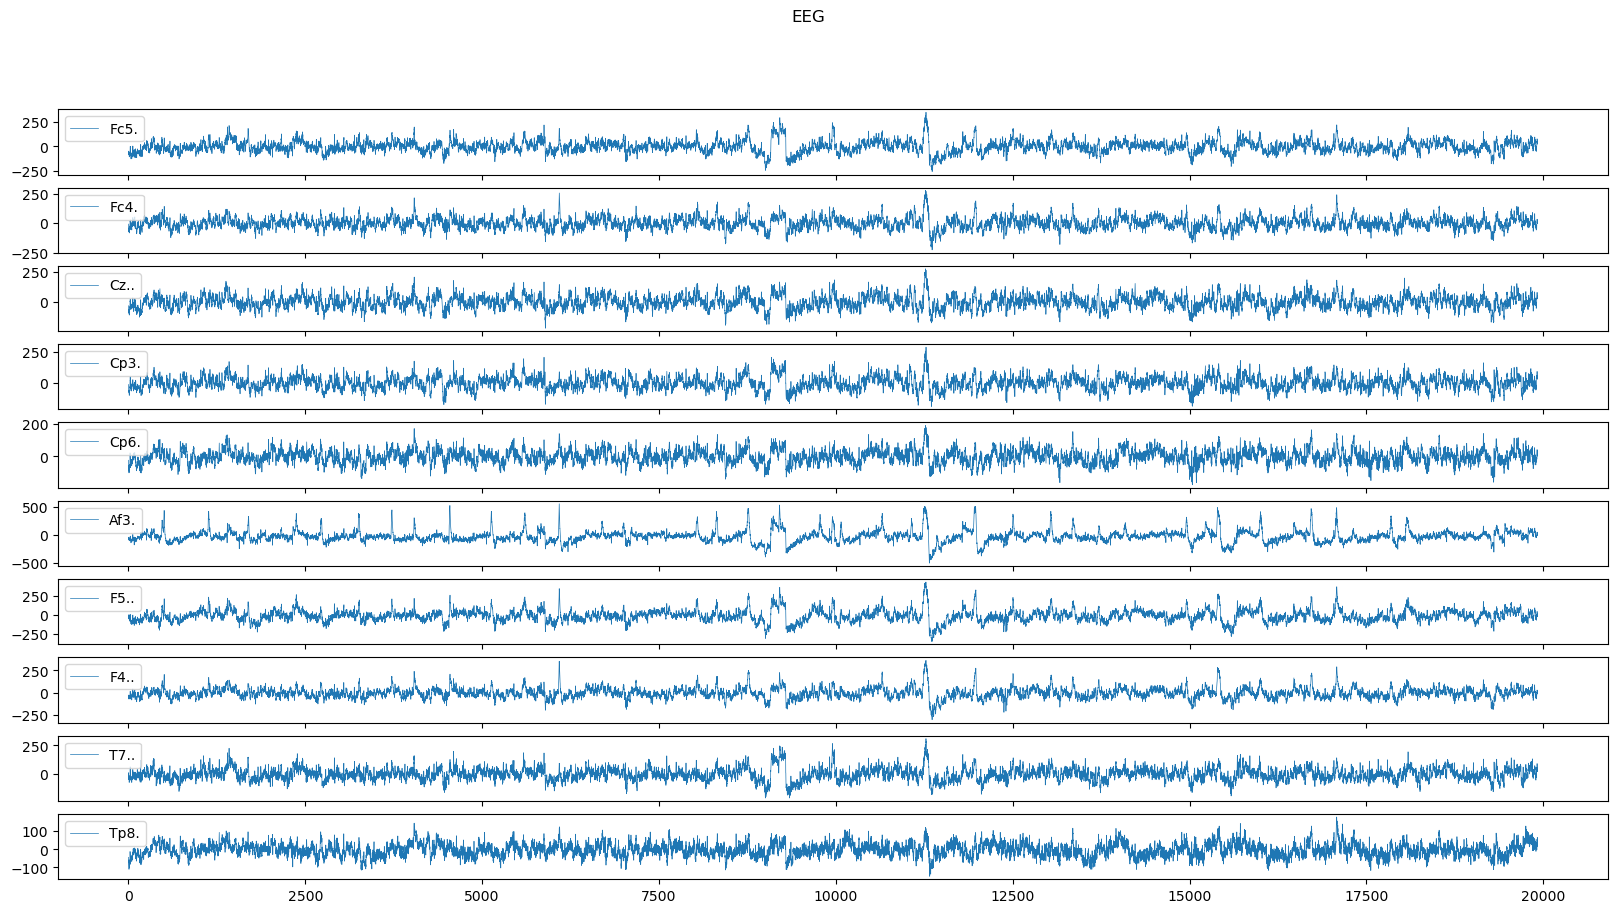

In [16]:
nplot= 10
fig, axs = plt.subplots(nplot, sharex=True)
fig.set_size_inches(20, 10)
fig.suptitle('EEG')

for i in range (nplot):
    axs[i].plot(data[5*i], linewidth=0.5, label=signal_labels[5*i])
    axs[i].legend()

## Color each task

In [18]:
marker = []
for i in annotation[1]:
    marker.append(i*160)
y = []
for counter, dataPoints in enumerate(marker):
    for i in range(int(dataPoints)):
        code = annotation[2][counter]
        if code == 'T0':
            y.append(0)
        elif code == 'T1':
            y.append(1)
        elif code == 'T2':
            y.append(2)
        else:
            #TODO
            print("catch error here")

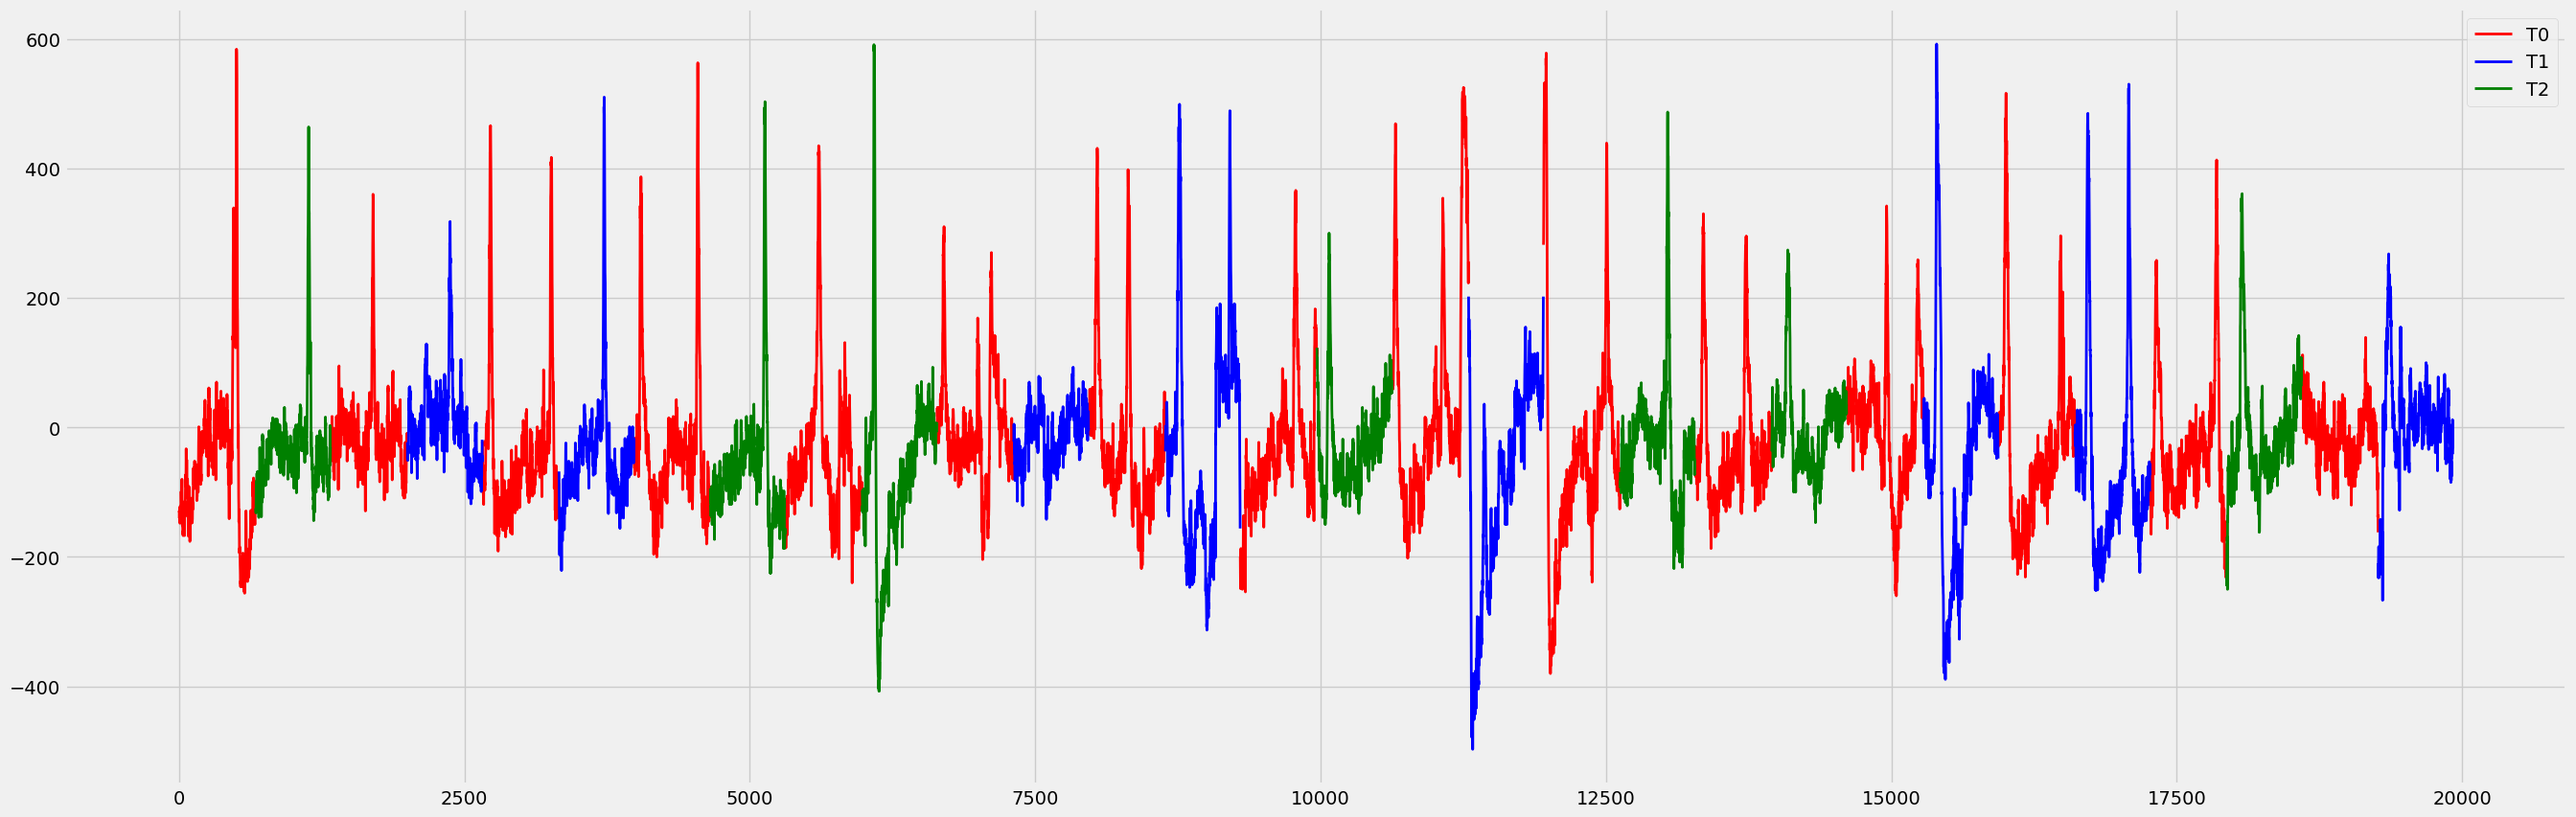

In [20]:
T0_data = data[23].copy()
T1_data = data[23].copy()
T2_data = data[23].copy()
T0_data[np.array(y) != 0] =np.nan
T1_data[np.array(y) != 1] =np.nan
T2_data[np.array(y) != 2] =np.nan

#plotting
plt.figure(1, figsize=(30, 10))

# plt.style.use('fivethirtyeight')
plt.plot(T0_data, color='r', linewidth=2, label="T0")
plt.plot(T1_data, color='b', linewidth=2, label="T1")
plt.plot(T2_data, color='g', linewidth=2, label="T2")

plt.legend()
plt.show()

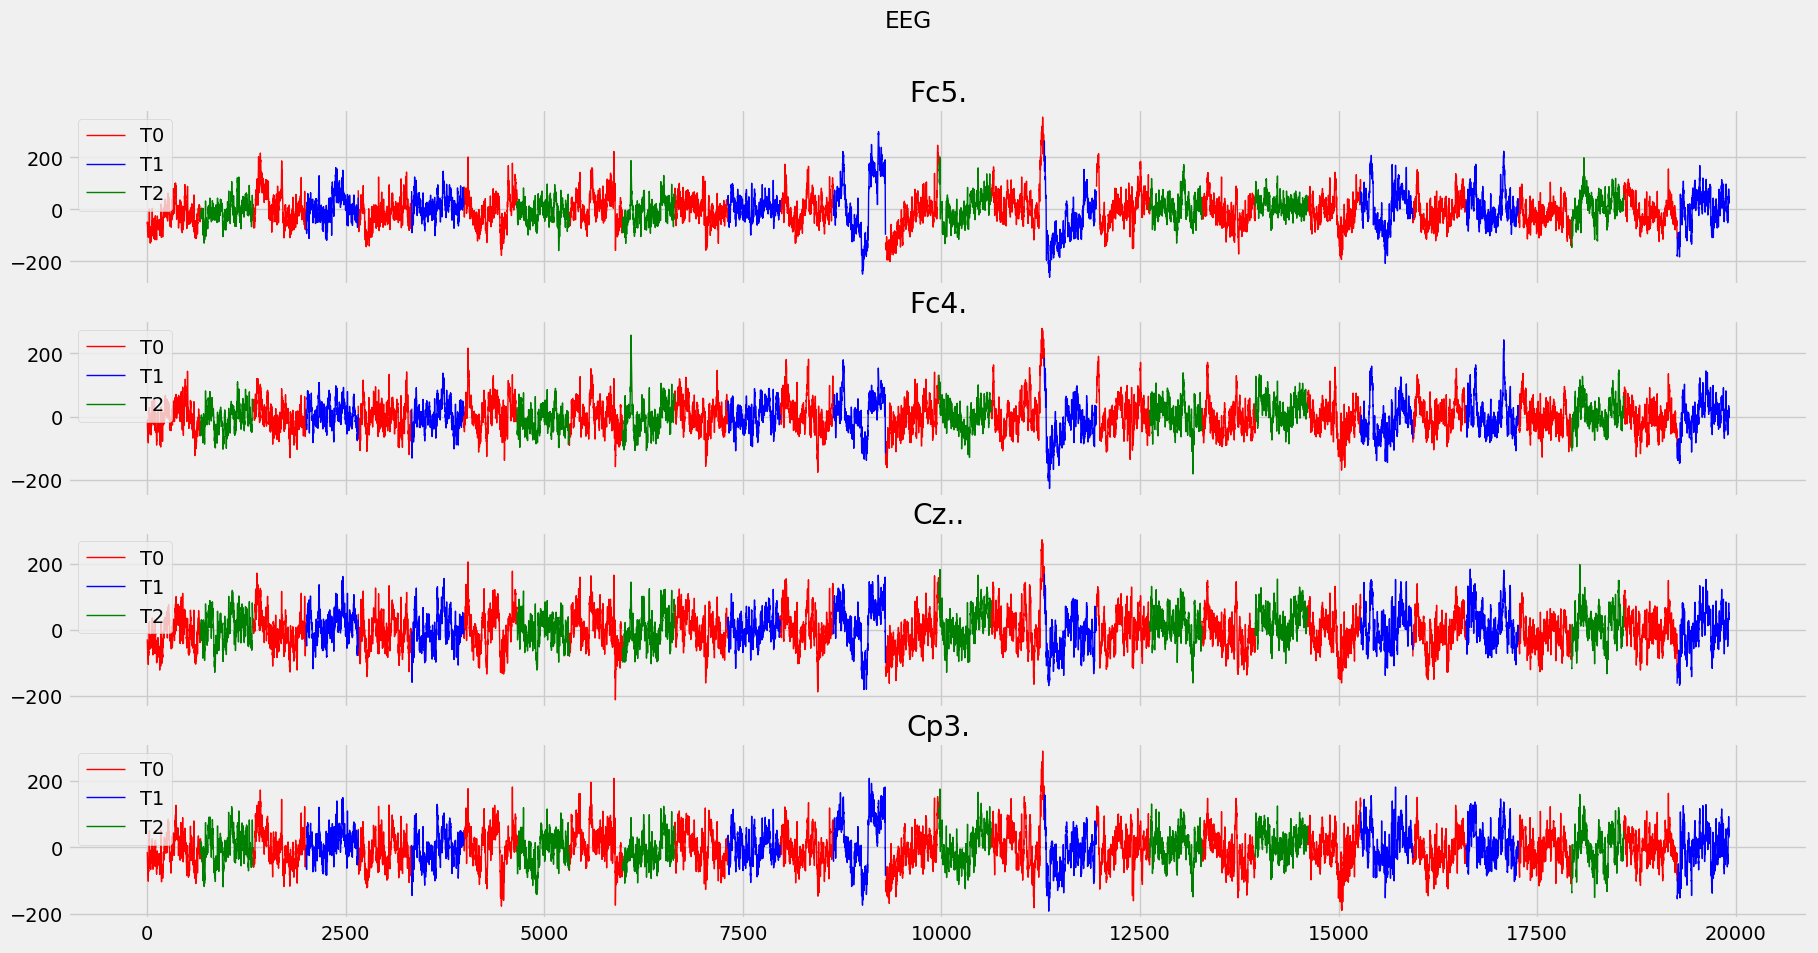

In [56]:
nplot=4
fig, axs = plt.subplots(nplot, sharex=True)
fig.set_size_inches(20, 10)
fig.suptitle('EEG')
# plt.style.use('fivethirtyeight')

for i in range (nplot):
    T0_data = data[5*i].copy()
    T1_data = data[5*i].copy()
    T2_data = data[5*i].copy()
    T0_data[np.array(y) != 0] =np.nan
    T1_data[np.array(y) != 1] =np.nan
    T2_data[np.array(y) != 2] =np.nan
    

    axs[i].plot(T0_data, color='r', linewidth=1, label="T0")
    axs[i].plot(T1_data, color='b', linewidth=1, label="T1")
    axs[i].plot(T2_data, color='g', linewidth=1, label="T2")
    axs[i].set_title(signal_labels[5*i])
    axs[i].legend()
    #axs[i].plot(data[5*i], linewidth=1, label=signal_labels[5*i])    
plt.legend()
plt.show()

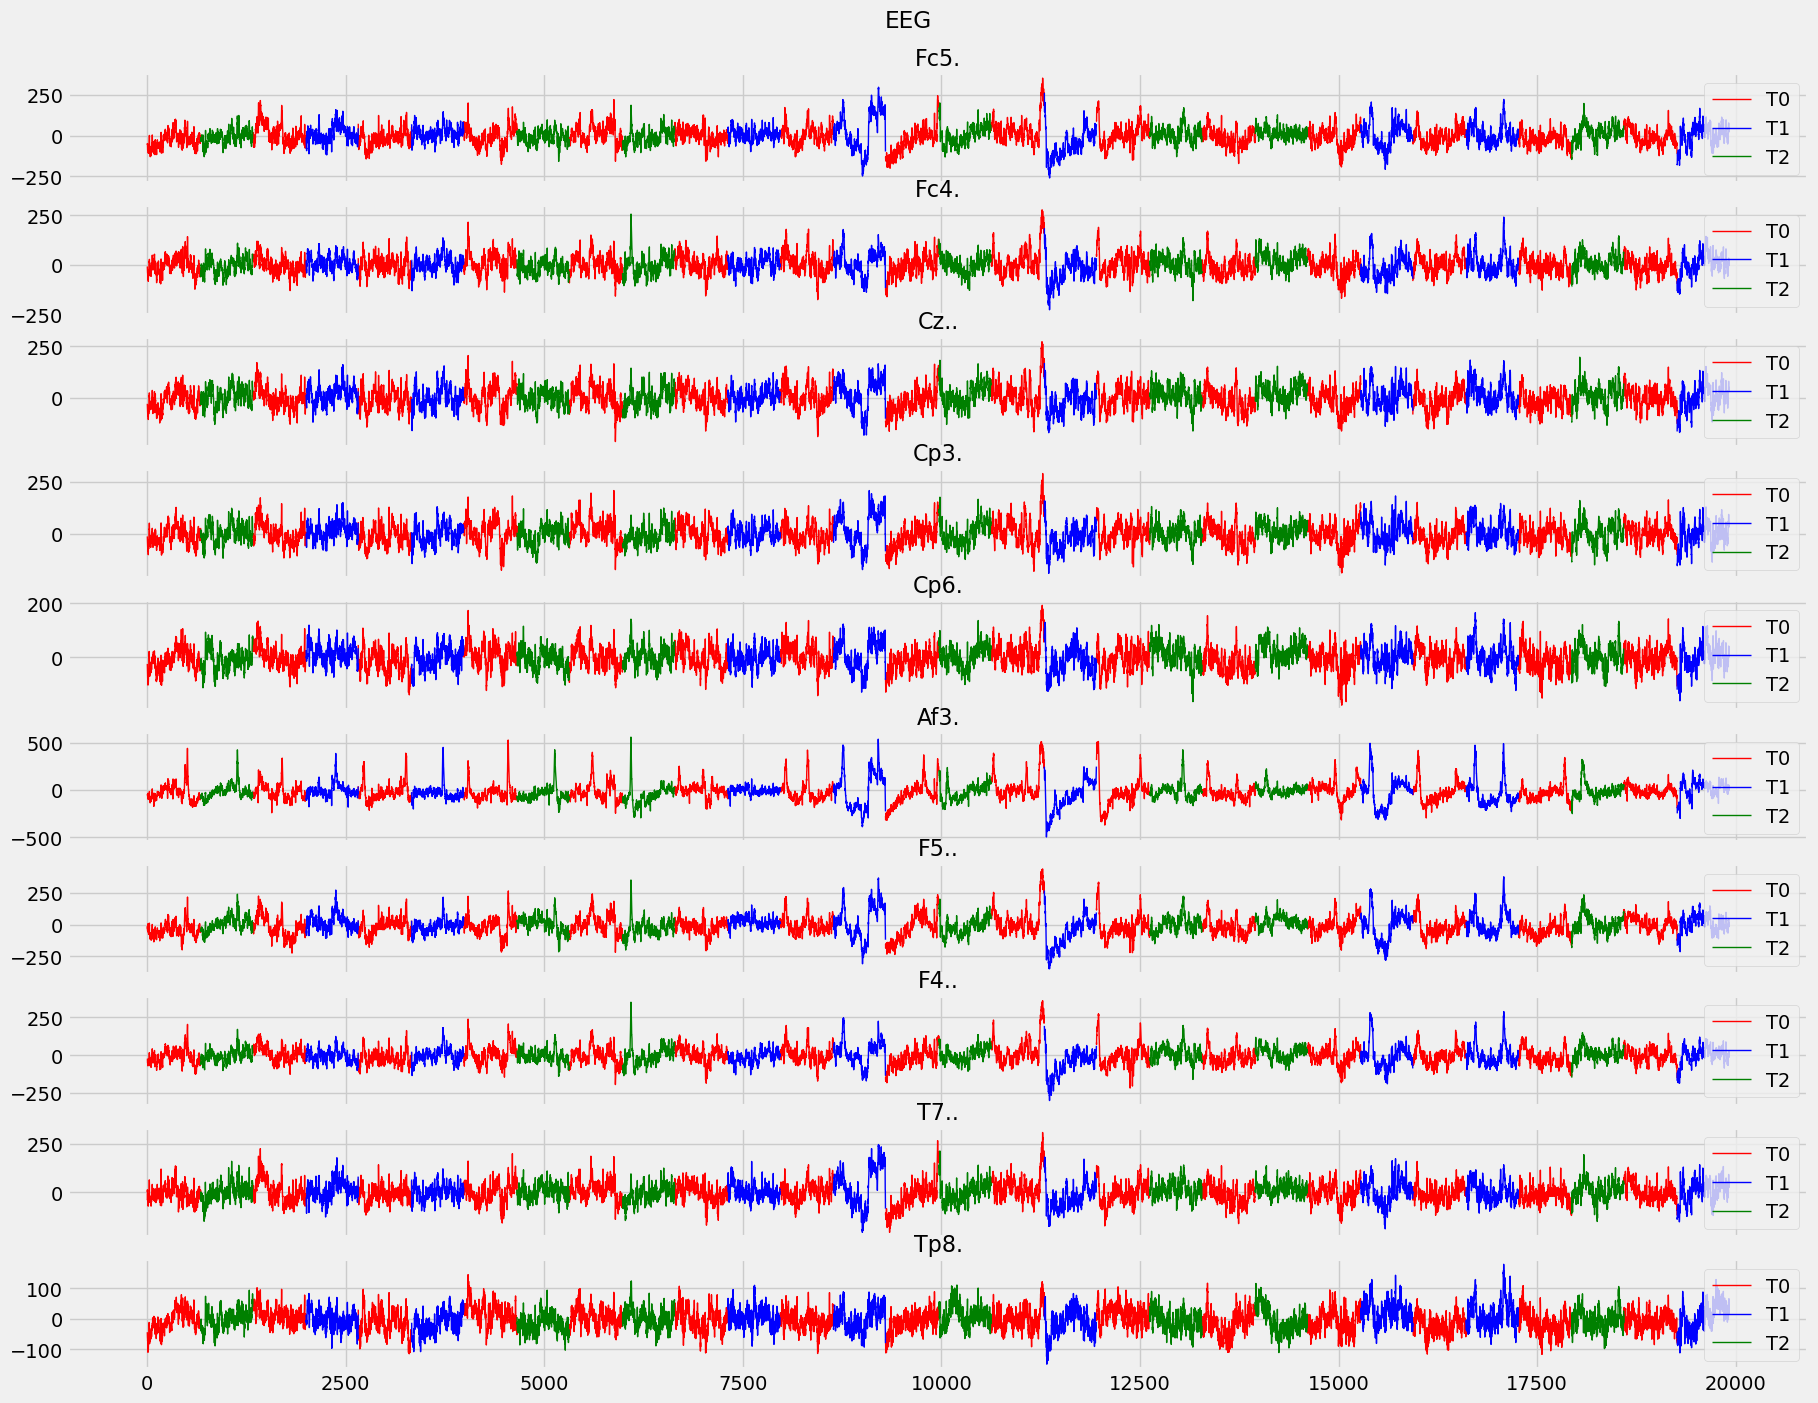

In [57]:
nplot=10
fig, axs = plt.subplots(nplot, sharex=True)
fig.set_size_inches(20, 16)
fig.suptitle('EEG',y=0.92)

# plt.style.use('fivethirtyeight')

for i in range (nplot):
    T0_data = data[5*i].copy()
    T1_data = data[5*i].copy()
    T2_data = data[5*i].copy()
    T0_data[np.array(y) != 0] =np.nan
    T1_data[np.array(y) != 1] =np.nan
    T2_data[np.array(y) != 2] =np.nan
    

    axs[i].plot(T0_data, color='r', linewidth=1, label="T0")
    axs[i].plot(T1_data, color='b', linewidth=1, label="T1")
    axs[i].plot(T2_data, color='g', linewidth=1, label="T2")
    axs[i].set_title(signal_labels[5*i], fontsize=16)
    axs[i].legend()
    #axs[i].plot(data[5*i], linewidth=1, label=signal_labels[5*i])    
plt.legend()
plt.show()